# Explore Mother Machine Data

We have an experiment where two carbon switches were done: details to come)

---

## Import packages

Before starting the code we need to import all the required packages.

We use a number of important Python packages:
- [Numpy](https://numpy.org): Goto package for vector/matrix based calculations (heavily inspired by Matlab)
- [Pandas](https://pandas.pydata.org): Goto package for handling data tables (heavily inspired by R) 
- [Matplotlib](https://matplotlib.org): Goto package for plotting data
- [Seaborn](https://seaborn.pydata.org): Fancy plots made easy (Similar to ggplot in R)
- [pathlib](https://docs.python.org/3/library/pathlib.html): Path handling made easy

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%gui qt

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import pathlib

---

## Import Data from BACMMAN

Set the path to the exported csv file from Bacmman to load it into Python.

Note there is also a python package that allows for direct interactions between python and Bacmman, for example to find and select problematic/interesting cells which you want to manually correct, a detailed explanation can be found [here](https://github.com/jeanollion/bacmman/wiki/Selections#create-selections-from-python).

If needed you can manually edit segmentation and tracking using the Bacmman GUI, see [here](https://github.com/jeanollion/bacmman/wiki/Data-Curation) for instructions. You can also look [at this screencast](https://www.github.com/jeanollion/bacmman/wiki/resources/screencast/manual_correction_dataset2.webm).

For time reasons we will skip these steps and just use the data as is.

In [5]:
root = pathlib.Path(pathlib.Path.home(), 'I2ICourse/')
proj_dir = (root / 'Project2C')

data_set_name = "MM_test" # change to the actual name of the dataset
objectClassIdx = 1 # 1 is for the object class #1 = bacteria

file_name =  '%s_%i.csv' %(data_set_name,objectClassIdx) 
file_path = proj_dir / file_name

print(file_path)

/Users/simonvanvliet/I2ICourse/Project2C/MM_test_1.csv


Now we  read this in with Pandas

In [6]:
df = pd.read_csv(file_path, sep=';') 

---

## Inspect Bacmman data format

Let's have a look at how Bacmman stores cell property data.

In [7]:
df.head()

,Position,PositionIdx,Indices,Frame,Idx,Time,BacteriaLineage,NextDivisionFrame,PreviousDivisionFrame,SizeRatio,...,GrowthRateArea,SizeAtBirthArea,Size,GrowthRateFeretMax,SizeAtBirthFeretMax,FeretMax,GrowthRateSpinelength,SizeAtBirthSpinelength,Spinelength,SpineWidth
0,2021-09-24_MM,0,0-0-0,0,0,0.0,A,2.0,NaN,NaN,...,0.005407,270.0000,270.0,0.017927,50.1597,50.1597,0.019316,47.4790,47.4790,4.3776
1,2021-09-24_MM,0,0-0-1,0,1,0.0,B,2.0,NaN,NaN,...,0.015028,259.0000,259.0,0.017688,52.0096,52.0096,0.019150,49.4658,49.4658,4.0005
2,2021-09-24_MM,0,0-0-2,0,2,0.0,C,NaN,NaN,NaN,...,-0.029345,255.1234,223.0,-0.029962,52.3695,46.0977,-0.032197,50.0635,43.4417,4.0009
3,2021-09-24_MM,0,0-0-3,0,3,0.0,D,NaN,NaN,NaN,...,NaN,NaN,87.0,NaN,NaN,16.4924,NaN,NaN,14.4474,4.0491
4,2021-09-24_MM,0,0-1-0,0,0,0.0,A,1.0,NaN,NaN,...,NaN,NaN,305.0,NaN,NaN,61.0328,NaN,NaN,58.5300,4.0595


There is quite some info here, but it is a bit obscure:
- `Position` is the name of the position (image)
- `PositionIdx` is an integer keeping track of which position you are in 
- `Indices` corresponds to `frame_nr - channel_nr - cell-nr`
- `Frame` is frame nr
- `Idx` is cell nr (1 = mother cells)
- `Bacteria` lineage keeps track of cell lineage (after each division a letter is added)

Annoyingly there is no field for channel, so let's add it. 

> **Exercise** 
> 
> Think about how you could do this
> 
> Hint: you can use python package [`re`](https://docs.python.org/3/library/re.html#) to extract it from the `Indices` field

In [8]:
import re
ChIdx = [int(re.split("\-",ind)[1]) for ind in df['Indices']]
df['ChannelIdx'] = ChIdx
df.head()

,Position,PositionIdx,Indices,Frame,Idx,Time,BacteriaLineage,NextDivisionFrame,PreviousDivisionFrame,SizeRatio,...,SizeAtBirthArea,Size,GrowthRateFeretMax,SizeAtBirthFeretMax,FeretMax,GrowthRateSpinelength,SizeAtBirthSpinelength,Spinelength,SpineWidth,ChannelIdx
0,2021-09-24_MM,0,0-0-0,0,0,0.0,A,2.0,NaN,NaN,...,270.0000,270.0,0.017927,50.1597,50.1597,0.019316,47.4790,47.4790,4.3776,0
1,2021-09-24_MM,0,0-0-1,0,1,0.0,B,2.0,NaN,NaN,...,259.0000,259.0,0.017688,52.0096,52.0096,0.019150,49.4658,49.4658,4.0005,0
2,2021-09-24_MM,0,0-0-2,0,2,0.0,C,NaN,NaN,NaN,...,255.1234,223.0,-0.029962,52.3695,46.0977,-0.032197,50.0635,43.4417,4.0009,0
3,2021-09-24_MM,0,0-0-3,0,3,0.0,D,NaN,NaN,NaN,...,NaN,87.0,NaN,NaN,16.4924,NaN,NaN,14.4474,4.0491,0
4,2021-09-24_MM,0,0-1-0,0,0,0.0,A,1.0,NaN,NaN,...,NaN,305.0,NaN,NaN,61.0328,NaN,NaN,58.5300,4.0595,1


---

## Inspect cell lineage information
Now let's look at the mother cell and first offspring in the first channel. Try to understand how  lineages are connected.

As you might notice lineages in different channels have the same BacteriaLineage code. Often it is very useful to have a unique lineage id, a number that is constant throughout a cell's life and that only occurs once within the data table. Can you come up with a good idea of how to implement this?

In [9]:
df.loc[(df['PositionIdx']==0) & (df['ChannelIdx']==2) & (df['Idx']<1) & (df['Frame']<6)]

,Position,PositionIdx,Indices,Frame,Idx,Time,BacteriaLineage,NextDivisionFrame,PreviousDivisionFrame,SizeRatio,...,SizeAtBirthArea,Size,GrowthRateFeretMax,SizeAtBirthFeretMax,FeretMax,GrowthRateSpinelength,SizeAtBirthSpinelength,Spinelength,SpineWidth,ChannelIdx
7,2021-09-24_MM,0,0-2-0,0,0,0.0,A,1.0,NaN,NaN,...,NaN,301.0,NaN,NaN,56.0089,NaN,NaN,53.2861,4.6086,2
92,2021-09-24_MM,0,1-2-0,1,0,10.0,AH,5.0,1.0,NaN,...,163.5952,163.0,0.016293,33.6977,35.0143,0.017464,31.0936,32.3056,3.8924,2
184,2021-09-24_MM,0,2-2-0,2,0,20.0,AH,5.0,1.0,NaN,...,163.5952,194.0,0.016293,33.6977,38.1182,0.017464,31.0936,35.4308,4.0091,2
271,2021-09-24_MM,0,3-2-0,3,0,30.0,AH,5.0,1.0,NaN,...,163.5952,221.0,0.016293,33.6977,45.0444,0.017464,31.0936,42.9339,4.0021,2
362,2021-09-24_MM,0,4-2-0,4,0,40.0,AH,5.0,1.0,NaN,...,163.5952,264.0,0.016293,33.6977,57.0088,0.017464,31.0936,54.2353,3.7564,2
454,2021-09-24_MM,0,5-2-0,5,0,50.0,AHH,9.0,5.0,NaN,...,166.6805,170.0,0.015631,30.7737,31.0161,0.016480,28.4519,28.7413,4.6752,2


To uniquely id a cell linage we need three pieces of info
- `Position-idx`
- `Channel-idx`
- `Bacteria-Lineage`

> **Exercise** 
> Think about how you could add a unique lineage id to the dataframe

Below we give an example of how to combine these fields to make a unique identifier.

In [10]:
#combine PositionIdx-ChannelIdx-BacteriaLineage into single string and add string lin_id_str property
df['lin_id_str'] = df['PositionIdx'].map(str) + '-' + df['ChannelIdx'].map(str) + '-' + df['BacteriaLineage'].map(str)

#show data-frame
df.tail()

,Position,PositionIdx,Indices,Frame,Idx,Time,BacteriaLineage,NextDivisionFrame,PreviousDivisionFrame,SizeRatio,...,Size,GrowthRateFeretMax,SizeAtBirthFeretMax,FeretMax,GrowthRateSpinelength,SizeAtBirthSpinelength,Spinelength,SpineWidth,ChannelIdx,lin_id_str
21484,2021-09-24_MM,0,216-25-0,216,0,2160.0,A1,NaN,NaN,NaN,...,94.0,NaN,NaN,29.0172,NaN,NaN,25.9326,2.0063,25,0-25-A1
21485,2021-09-24_MM,0,216-25-1,216,1,2160.0,BHHH,NaN,23.0,NaN,...,56.0,-0.000207,20.8684,15.0333,-0.000257,17.9202,11.1341,2.5426,25,0-25-BHHH
21486,2021-09-24_MM,0,216-25-2,216,2,2160.0,B1,NaN,NaN,NaN,...,54.0,NaN,NaN,15.0333,NaN,NaN,12.1459,2.2772,25,0-25-B1
21487,2021-09-24_MM,0,216-25-3,216,3,2160.0,BHTHH,NaN,167.0,NaN,...,97.0,0.000066,26.8907,27.1662,-0.000195,29.0250,24.0362,2.2663,25,0-25-BHTHH
21488,2021-09-24_MM,0,216-25-4,216,4,2160.0,BTHH,NaN,17.0,NaN,...,112.0,-0.000055,28.4215,25.1794,-0.000029,24.0761,23.2248,3.2154,25,0-25-BTHH


Now we can extract a cell lineage (e.g. 0-2-AH, which is position 0, channel 2, first offspring of mother cell) as:

In [11]:
df_sub = df.loc[df['lin_id_str']=='0-2-AHHHHHHHHHHHHHHHHH']
df_sub.head()

,Position,PositionIdx,Indices,Frame,Idx,Time,BacteriaLineage,NextDivisionFrame,PreviousDivisionFrame,SizeRatio,...,Size,GrowthRateFeretMax,SizeAtBirthFeretMax,FeretMax,GrowthRateSpinelength,SizeAtBirthSpinelength,Spinelength,SpineWidth,ChannelIdx,lin_id_str
10393,2021-09-24_MM,0,102-2-0,102,0,1020.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,76.0,0.004017,16.5205,16.0312,0.00495,13.499,13.4999,3.4395,2,0-2-AHHHHHHHHHHHHHHHHH
10514,2021-09-24_MM,0,103-2-0,103,0,1030.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,80.0,0.004017,16.5205,17.1172,0.00495,13.499,14.7827,3.5280,2,0-2-AHHHHHHHHHHHHHHHHH
10637,2021-09-24_MM,0,104-2-0,104,0,1040.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,83.0,0.004017,16.5205,17.1172,0.00495,13.499,14.6546,3.7981,2,0-2-AHHHHHHHHHHHHHHHHH
10757,2021-09-24_MM,0,105-2-0,105,0,1050.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,86.0,0.004017,16.5205,18.2483,0.00495,13.499,15.6811,3.6912,2,0-2-AHHHHHHHHHHHHHHHHH
10877,2021-09-24_MM,0,106-2-0,106,0,1060.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,93.0,0.004017,16.5205,20.0250,0.00495,13.499,17.2831,3.9243,2,0-2-AHHHHHHHHHHHHHHHHH


## Calculating Time Resolved Growth Rates

We first define a function to calculate growth rate from a length trajectory.
We do this by doing a linear fit the the log transformed length

In [19]:
def growth_rate(length, frm_interval=1):
    if length.size > 2:
        y = np.log(length) #log length
        x = np.arange(y.size) * frm_interval
        p = np.polyfit(x, y, 1) #simply 1st order polynomial fit / regression (numpy.polyfit)
        mu = p[0] #slope of first order fit in python p[0]
    else: 
        mu = np.nan 
    return mu 

Now we apply this to every cell (using `groupby`) over a rolling window (using `rolling`). Here we use a window of length 3, and assign the growth rate to the central point in the window.

We then add this data to the dataframe.

In [20]:
frm_interval = 10./60
elrate = df.groupby('lin_id_str')['Spinelength'].rolling(3, min_periods=2, center=True).apply(growth_rate, kwargs={'frm_interval':frm_interval}).reset_index(0,drop=True)
df['Elongation Rate'] = elrate
df.head()

,Position,PositionIdx,Indices,Frame,Idx,Time,BacteriaLineage,NextDivisionFrame,PreviousDivisionFrame,SizeRatio,...,GrowthRateFeretMax,SizeAtBirthFeretMax,FeretMax,GrowthRateSpinelength,SizeAtBirthSpinelength,Spinelength,SpineWidth,ChannelIdx,lin_id_str,Elongation Rate
0,2021-09-24_MM,0,0-0-0,0,0,0.0,A,2.0,NaN,NaN,...,0.017927,50.1597,50.1597,0.019316,47.4790,47.4790,4.3776,0,0-0-A,NaN
1,2021-09-24_MM,0,0-0-1,0,1,0.0,B,2.0,NaN,NaN,...,0.017688,52.0096,52.0096,0.019150,49.4658,49.4658,4.0005,0,0-0-B,NaN
2,2021-09-24_MM,0,0-0-2,0,2,0.0,C,NaN,NaN,NaN,...,-0.029962,52.3695,46.0977,-0.032197,50.0635,43.4417,4.0009,0,0-0-C,NaN
3,2021-09-24_MM,0,0-0-3,0,3,0.0,D,NaN,NaN,NaN,...,NaN,NaN,16.4924,NaN,NaN,14.4474,4.0491,0,0-0-D,NaN
4,2021-09-24_MM,0,0-1-0,0,0,0.0,A,1.0,NaN,NaN,...,NaN,NaN,61.0328,NaN,NaN,58.5300,4.0595,1,0-1-A,NaN


Let's look at an individual cell:

In [ ]:
df_sub = df.loc[df['lin_id_str']=='0-2-AHHHHHHHHHHHHHHHHH']
df_sub.head(n=10)

,Position,PositionIdx,Indices,Frame,Idx,Time,BacteriaLineage,NextDivisionFrame,PreviousDivisionFrame,SizeRatio,...,SizeAtBirthFeretMax,FeretMax,GrowthRateSpinelength,SizeAtBirthSpinelength,Spinelength,SpineWidth,ChannelIdx,lin_id_str,temp,Elongation Rate
10393,2021-09-24_MM,0,102-2-0,102,0,1020.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,16.5205,16.0312,0.00495,13.499,13.4999,3.4395,2,0-2-AHHHHHHHHHHHHHHHHH,NaN,NaN
10514,2021-09-24_MM,0,103-2-0,103,0,1030.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,16.5205,17.1172,0.00495,13.499,14.7827,3.5280,2,0-2-AHHHHHHHHHHHHHHHHH,0.246216,0.246216
10637,2021-09-24_MM,0,104-2-0,104,0,1040.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,16.5205,17.1172,0.00495,13.499,14.6546,3.7981,2,0-2-AHHHHHHHHHHHHHHHHH,0.176996,0.176996
10757,2021-09-24_MM,0,105-2-0,105,0,1050.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,16.5205,18.2483,0.00495,13.499,15.6811,3.6912,2,0-2-AHHHHHHHHHHHHHHHHH,0.494925,0.494925
10877,2021-09-24_MM,0,106-2-0,106,0,1060.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,16.5205,20.0250,0.00495,13.499,17.2831,3.9243,2,0-2-AHHHHHHHHHHHHHHHHH,0.170641,0.170641
10998,2021-09-24_MM,0,107-2-0,107,0,1070.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,16.5205,19.4165,0.00495,13.499,16.5989,3.5322,2,0-2-AHHHHHHHHHHHHHHHHH,0.316637,0.316637
11122,2021-09-24_MM,0,108-2-0,108,0,1080.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,16.5205,22.3607,0.00495,13.499,19.2070,3.2747,2,0-2-AHHHHHHHHHHHHHHHHH,0.517469,0.517469
11243,2021-09-24_MM,0,109-2-0,109,0,1090.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,16.5205,23.3452,0.00495,13.499,19.7238,3.4991,2,0-2-AHHHHHHHHHHHHHHHHH,0.286598,0.286598
11364,2021-09-24_MM,0,110-2-0,110,0,1100.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,16.5205,24.0832,0.00495,13.499,21.1324,3.5396,2,0-2-AHHHHHHHHHHHHHHHHH,0.384235,0.384235
11484,2021-09-24_MM,0,111-2-0,111,0,1110.0,AHHHHHHHHHHHHHHHHH,125.0,102.0,NaN,...,16.5205,25.1794,0.00495,13.499,22.4189,3.6746,2,0-2-AHHHHHHHHHHHHHHHHH,0.103405,0.103405


We can also plot the result:

<AxesSubplot:>

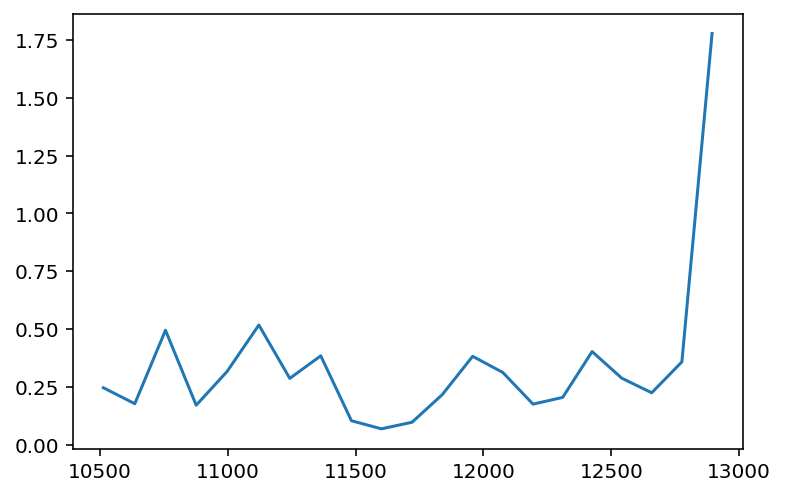

In [ ]:
df_sub = df.loc[df['lin_id_str']=='0-2-AHHHHHHHHHHHHHHHHH']
df_sub['Elongation Rate'].plot()


## Manual mode

You can also manually loop over cells

In [ ]:


fitWindow = 3 #length of moving fit window; 
dt = 10/60

#get cell info, normally you would loop over all cells here
df_sub = df.loc[df['lin_id_str']=='0-2-AHHHHHHHHHHHHHHHHH']

#get cell length and frames
cellLength = np.array(df_sub["Spinelength"]) #vector of cell length;
frames = np.arange(len(cellLength))

nFramesCell = len(cellLength) #number of frames of cell lineage

#init output
growthRate = np.full(nFramesCell, np.nan)

hw = int(np.floor(fitWindow/2))
if nFramesCell>=(fitWindow):
    #loop all frames where we can fit full window 
    for ff in range(hw, nFramesCell-hw):
        #get frames to fit
        startFr = max(0, ff-hw)
        endFr = min(nFramesCell-1, ff+hw)
        framesToFit = np.array(range(startFr,endFr+1)) 

        #fit growth rate
        x = framesToFit*dt #time axis
        y = np.log(cellLength[framesToFit]) #log length

        p = np.polyfit(x, y, 1) #simply 1st order polynomial fit / regression (numpy.polyfit)
        growthRate[ff]=p[0] #slope of first order fit in python p[0]

Now we plot both growth rates, and luckily they agree

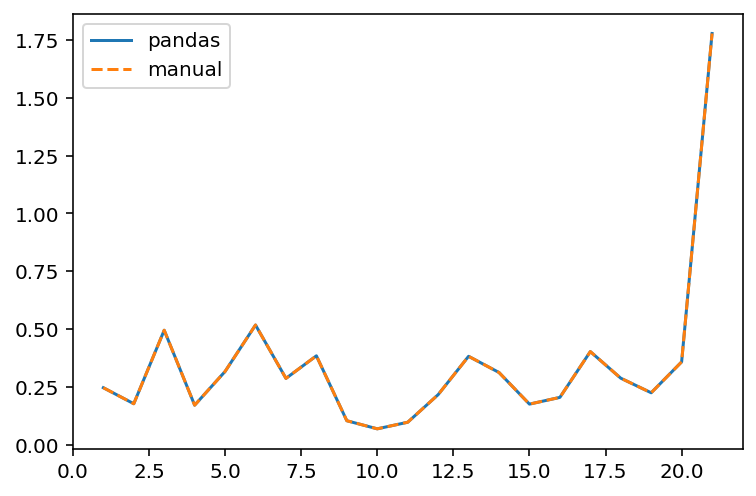

In [ ]:
fig, axs = plt.subplots(1)
axs.plot(frames, np.array(df_sub['temp']),'-',label='pandas')
axs.plot(frames, growthRate,'--',label='manual')
axs.legend()




---

## Save data to disk
This would be a good time to save your data. 

In [9]:
save_name = proj_dir / 'cell_data.pkl'
df.to_pickle(save_name)

---

## Next Step: Explore data

**Before the next step the Tutors will give an introduction, if you are ready for this step please let them know!**

We continue in the next notebook `1_explore_data_bacmman`